Obter base de dados

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from rapidfuzz import process
import unidecode

In [137]:
# a. Obter base de dados: Faça download da base de dados neste link.
file_id = "1DcS1VgGGVa5O6JHuD7ZeKmxgI1ejCw4m"
url = f"https://drive.google.com/uc?id={file_id}"
dados = pd.read_csv(url)

In [138]:
# Função para limpar o nome dos distritos
def limpar_nome_distrito(distrito):
    distrito = distrito.strip()  # Remover espaços em branco no início e no fim
    distrito = unidecode.unidecode(distrito)  # Remover acentos
    distrito = distrito.lower()  # Converter para minúsculas
    return distrito

In [139]:
# Aplicar a função de limpeza na coluna 'district'
dados['district'] = dados['district'].apply(limpar_nome_distrito)

In [140]:
# Obter a lista única de distritos
distritos_unicos = dados['district'].unique()

In [141]:
# Função para encontrar o melhor nome padrão para cada distrito
def encontrar_nome_padrao(nome, lista_nomes, threshold=80):
    match = process.extractOne(nome, lista_nomes, score_cutoff=threshold)
    if match:
        return match[0]
    return nome

In [142]:
# Aplicar a função de correção automatizada
lista_distritos_padrao = []
for distrito in distritos_unicos:
    nome_padrao = encontrar_nome_padrao(distrito, lista_distritos_padrao)
    if nome_padrao == distrito:
        lista_distritos_padrao.append(distrito)
    else:
        dados['district'] = dados['district'].replace(distrito, nome_padrao)

In [143]:
# Testando a função
nome_padrao = encontrar_nome_padrao("distrito", ["district", "bairro", "região"])
print(nome_padrao)  # Deve imprimir 'district' se a correspondência for encontrada com um limiar de 80

district


In [144]:
# Visualizar as primeiras linhas para verificar a limpeza
print(dados[['address', 'district']].head(20))

                     address           district
0                 Rua Herval         belenzinho
1         Avenida São Miguel       vila marieta
2           Rua Oscar Freire          pinheiros
3           Rua Júlio Sayago       vila marieta
4         Rua Barata Ribeiro         bela vista
5         Rua Domingos Paiva               bras
6             Rua Guararapes  brooklin paulista
7      Avenida Cásper Líbero             centro
8     Rua José Peres Campelo            piqueri
9              Rua Guaperuvu    vila aricanduva
10        Rua dos Carmelitas                 se
11          Rua Tabatinguera                 se
12     Rua Henrique Sertório            tatuape
13               Rua Herison   lauzane paulista
14       Rua Orestes Barbosa   jardim paraventi
15               Rua Scuvero            cambuci
16  Rua Doutor Tomaz de Lima          liberdade
17   Rua Conselheiro Furtado          liberdade
18             Rua Guaraiuva     cidade moncoes
19       Rua Torres da Barra        agua

Importação e Limpeza

In [145]:
# b. Importação e Limpeza: Importe os dados para um DataFrame do Pandas, limpe os dados e trate valores ausentes.
print("Antes da limpeza:")
print(dados.head())

Antes da limpeza:
              address      district  area  bedrooms  garage  \
0          Rua Herval    belenzinho    21         1       0   
1  Avenida São Miguel  vila marieta    15         1       1   
2    Rua Oscar Freire     pinheiros    18         1       0   
3    Rua Júlio Sayago  vila marieta    56         2       2   
4  Rua Barata Ribeiro    bela vista    19         1       0   

                 type  rent  total  
0     Studio e kitnet  2400   2939  
1     Studio e kitnet  1030   1345  
2         Apartamento  4000   4661  
3  Casa em condomínio  1750   1954  
4     Studio e kitnet  4000   4654  


In [146]:
print("\nValores ausentes antes da limpeza:")
print(dados.isnull().sum())


Valores ausentes antes da limpeza:
address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64


In [147]:
# Preencher valores ausentes nas colunas não numéricas com uma string vazia
dados = dados.fillna('')

In [148]:
# Dicionário com valores específicos para preencher em cada coluna não numérica
valores_preenchimento = {'endereco': 'endereco_desconhecido', 'bairro': 'bairro_desconhecido', 'tipo': 'tipo_desconhecido'}
dados = dados.fillna(valores_preenchimento)

In [149]:
print("\nDepois da limpeza:")
print(dados.head())


Depois da limpeza:
              address      district  area  bedrooms  garage  \
0          Rua Herval    belenzinho    21         1       0   
1  Avenida São Miguel  vila marieta    15         1       1   
2    Rua Oscar Freire     pinheiros    18         1       0   
3    Rua Júlio Sayago  vila marieta    56         2       2   
4  Rua Barata Ribeiro    bela vista    19         1       0   

                 type  rent  total  
0     Studio e kitnet  2400   2939  
1     Studio e kitnet  1030   1345  
2         Apartamento  4000   4661  
3  Casa em condomínio  1750   1954  
4     Studio e kitnet  4000   4654  


Análise Descritiva

In [150]:
# c. Análise Descritiva: Realize uma análise descritiva dos dados, calculando estatísticas básicas e identificando tendências.
media_aluguel = dados['rent'].mean()
mediana_aluguel = dados['rent'].median()
desvio_padrao_aluguel = dados['rent'].std()

print(f"Média do aluguel: {media_aluguel:.2f}")
print(f"Mediana do aluguel: {mediana_aluguel:.2f}")
print(f"Desvio padrão do aluguel: {desvio_padrao_aluguel:.2f}")

Média do aluguel: 3250.81
Mediana do aluguel: 2415.00
Desvio padrão do aluguel: 2650.71


In [151]:
# Análise 2: Tipos de imóveis
contagem_tipos = dados['type'].value_counts()
print("\nContagem de tipos de imóveis:")
print(contagem_tipos)


Contagem de tipos de imóveis:
type
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64


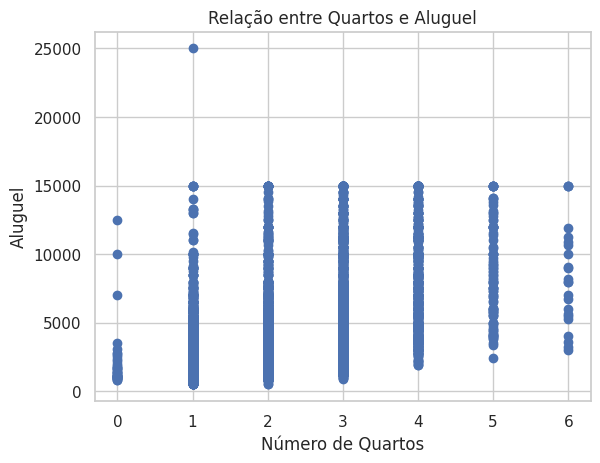

In [152]:
# Análise 3: Relação entre quartos e aluguel
plt.scatter(dados['bedrooms'], dados['rent'])
plt.xlabel("Número de Quartos")
plt.ylabel("Aluguel")
plt.title("Relação entre Quartos e Aluguel")
plt.show()

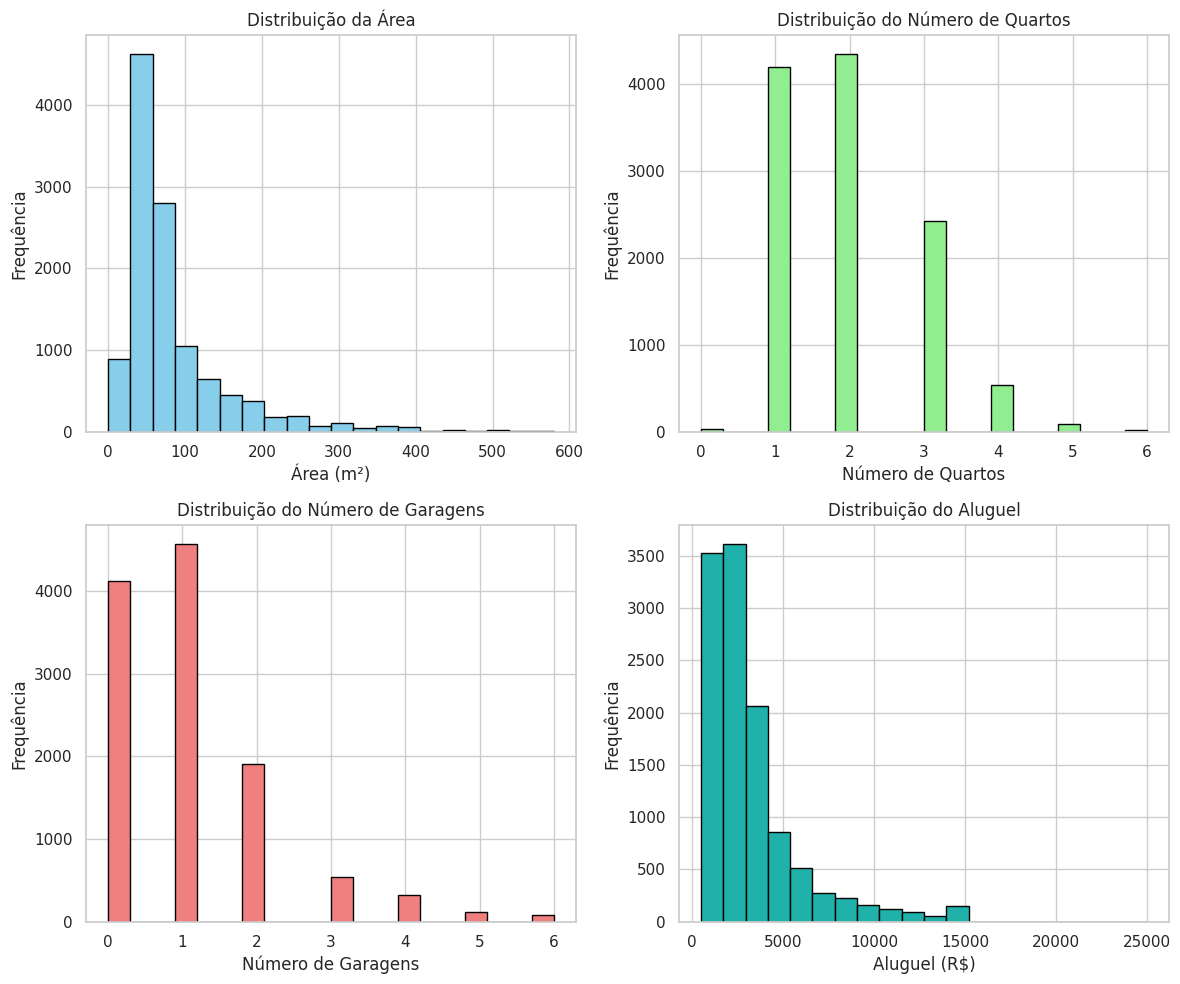

In [153]:
# Plotar histogramas para variáveis numéricas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(dados['area'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribuição da Área')
axs[0, 0].set_xlabel('Área (m²)')
axs[0, 0].set_ylabel('Frequência')

axs[0, 1].hist(dados['bedrooms'], bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Distribuição do Número de Quartos')
axs[0, 1].set_xlabel('Número de Quartos')
axs[0, 1].set_ylabel('Frequência')

axs[1, 0].hist(dados['garage'], bins=20, color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Distribuição do Número de Garagens')
axs[1, 0].set_xlabel('Número de Garagens')
axs[1, 0].set_ylabel('Frequência')

axs[1, 1].hist(dados['rent'], bins=20, color='lightseagreen', edgecolor='black')
axs[1, 1].set_title('Distribuição do Aluguel')
axs[1, 1].set_xlabel('Aluguel (R$)')
axs[1, 1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


Modelagem de Regressão Linear

In [154]:
# d. Modelagem de Regressão Linear: Ajuste um modelo de regressão linear aos dados para tentar prever o preço do aluguel em uma determinada área.
# Label Encoding para a coluna 'district'
label_encoder = LabelEncoder()
dados['district_encoded'] = label_encoder.fit_transform(dados['district'])

In [155]:
# Transformar a coluna 'type' em variáveis dummy
dados = pd.get_dummies(dados, columns=['type'], drop_first=True)

In [175]:
#REVISAR -- district
# Selecionar variáveis independentes (features) e variável dependente (target)
X = dados.drop(['address', 'rent', 'district'], axis=1)  # Remover colunas não relevantes e a coluna alvo
y = dados['rent']

In [173]:
# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Ajuste do modelo de regressão linear aos dados de treinamento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [159]:
# Fazer previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

In [160]:
# Avaliar o desempenho do modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (RMSE): {rmse}')
print(f'Coeficiente de Determinação (R²): {r2}')

Erro Quadrático Médio (RMSE): 452.6832286117414
Coeficiente de Determinação (R²): 0.9709960219549971


In [161]:
#REVISAR -- resultado total
# Visualizar os coeficientes do modelo
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes do modelo:")
print(coeficientes)


Coeficientes do modelo:
                         Coeficiente
area                       -1.092204
bedrooms                   37.604555
garage                    -21.663937
total                       0.791022
district_encoded           -0.180151
type_Casa                 678.781985
type_Casa em condomínio   527.794014
type_Studio e kitnet      147.566040


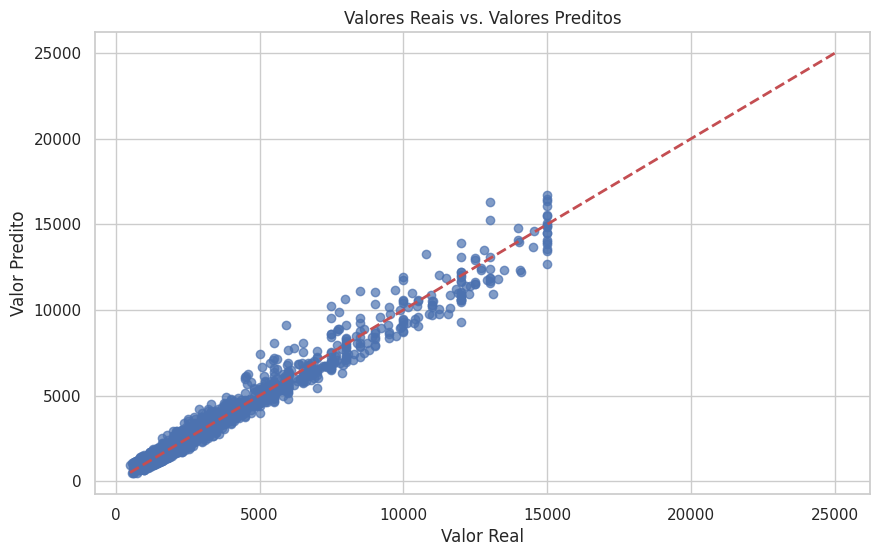

In [162]:
# Plotar a comparação entre valores reais e preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valores Reais vs. Valores Preditos')
plt.show()

#Interpretação do Novo Gráfico
#Linha Vermelha Tracejada: Representa a linha onde os valores preditos seriam exatamente iguais aos valores reais.
#Pontos Azuis: Mostram a dispersão dos valores reais versus os preditos. Quanto mais próximos os pontos estiverem da linha vermelha, melhor será a performance do modelo.
#Se muitos pontos estiverem distantes da linha, isso indica que o modelo está cometendo erros maiores em suas previsões. Se os pontos estiverem alinhados próximos à linha, isso indica boas previsões.

Visualização de Dados

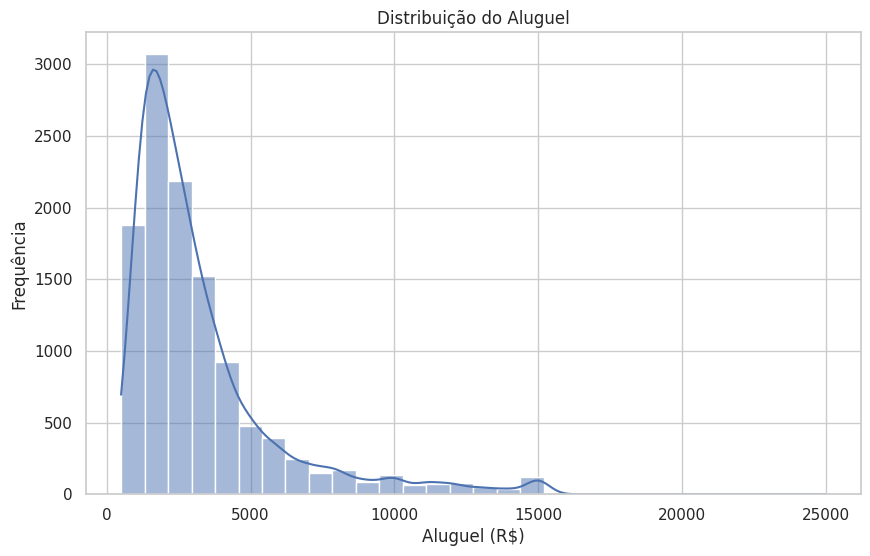

In [163]:
# Histograma do Aluguel
plt.figure(figsize=(10, 6))
sns.histplot(dados['rent'], bins=30, kde=True)
plt.title('Distribuição do Aluguel')
plt.xlabel('Aluguel (R$)')
plt.ylabel('Frequência')
plt.show()

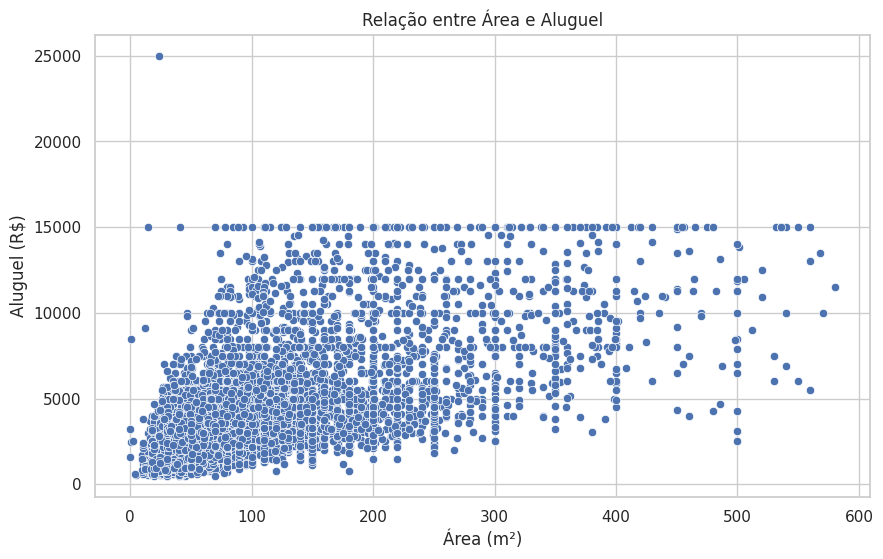

In [164]:
# Scatter Plot entre Área e Aluguel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='rent', data=dados)
plt.title('Relação entre Área e Aluguel')
plt.xlabel('Área (m²)')
plt.ylabel('Aluguel (R$)')
plt.show()

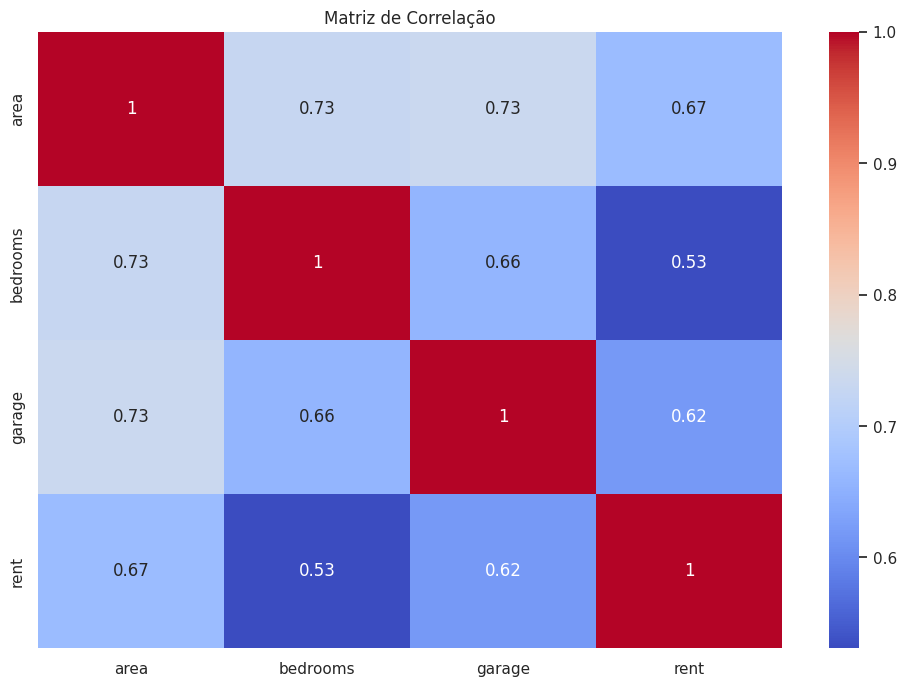

In [165]:
# Matriz de Correlação
plt.figure(figsize=(12, 8))
correlation_matrix = dados[['area', 'bedrooms', 'garage', 'rent']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

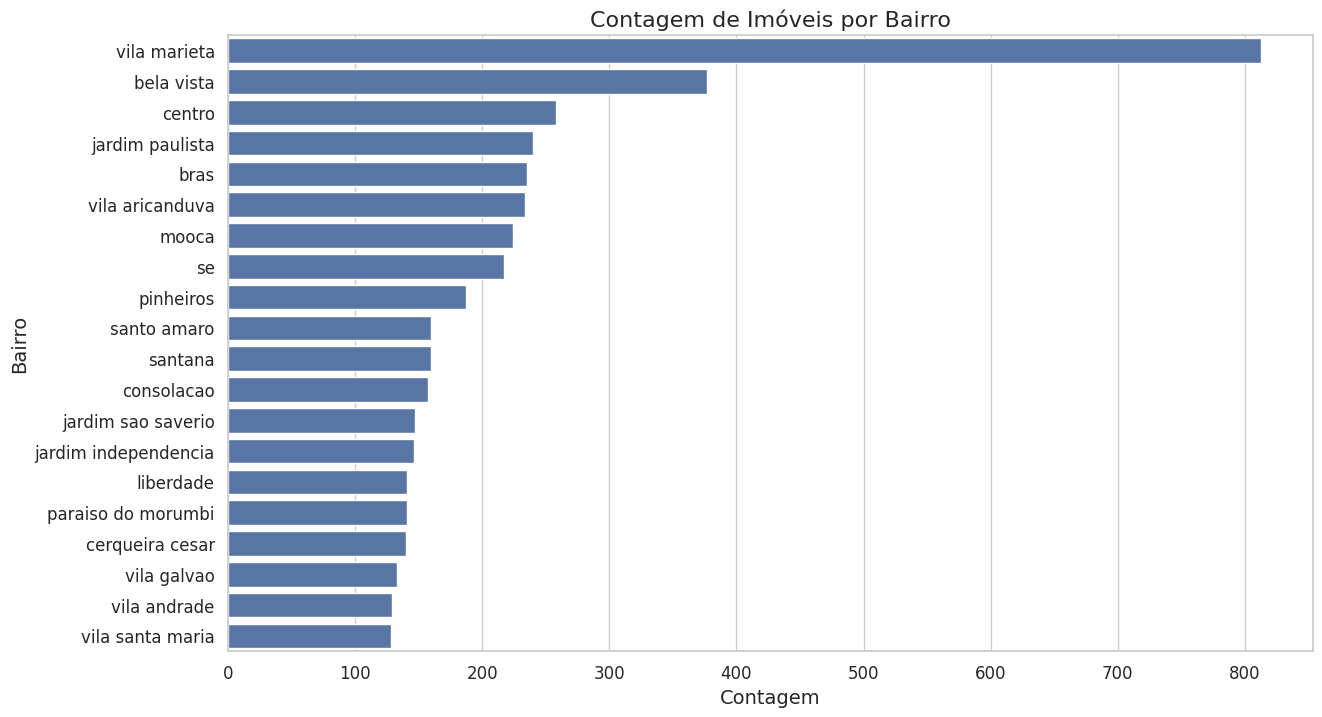

In [166]:
# Contagem de Imóveis por Bairro (limitado aos 20 bairros mais comuns)
plt.figure(figsize=(14, 8))
top_districts = dados['district'].value_counts().index[:20]  # Limitar aos 20 bairros mais comuns
sns.countplot(y='district', data=dados[dados['district'].isin(top_districts)], order=top_districts)
plt.title('Contagem de Imóveis por Bairro', fontsize=16)
plt.xlabel('Contagem', fontsize=14)
plt.ylabel('Bairro', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_theme(style="whitegrid")  # Adicionar um tema estético
plt.show()

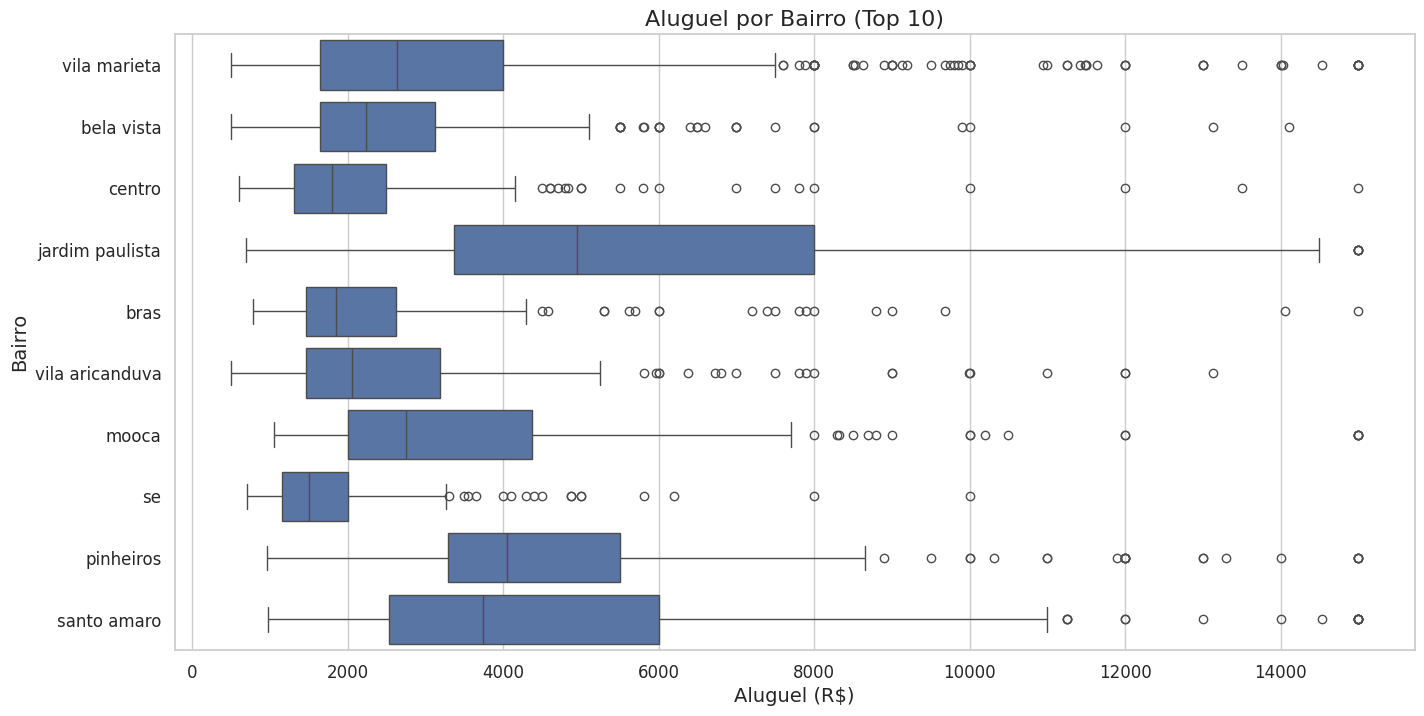

In [167]:
# Boxplot do Aluguel por Bairro (para os 10 bairros mais comuns)
plt.figure(figsize=(16, 8))
top_10_bairros = dados['district'].value_counts().index[:10]
sns.boxplot(x='rent', y='district', data=dados[dados['district'].isin(top_10_bairros)], order=top_10_bairros)
plt.title('Aluguel por Bairro (Top 10)', fontsize=16)
plt.xlabel('Aluguel (R$)', fontsize=14)
plt.ylabel('Bairro', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_theme(style="whitegrid")  # Adicionar um tema estético
plt.show()

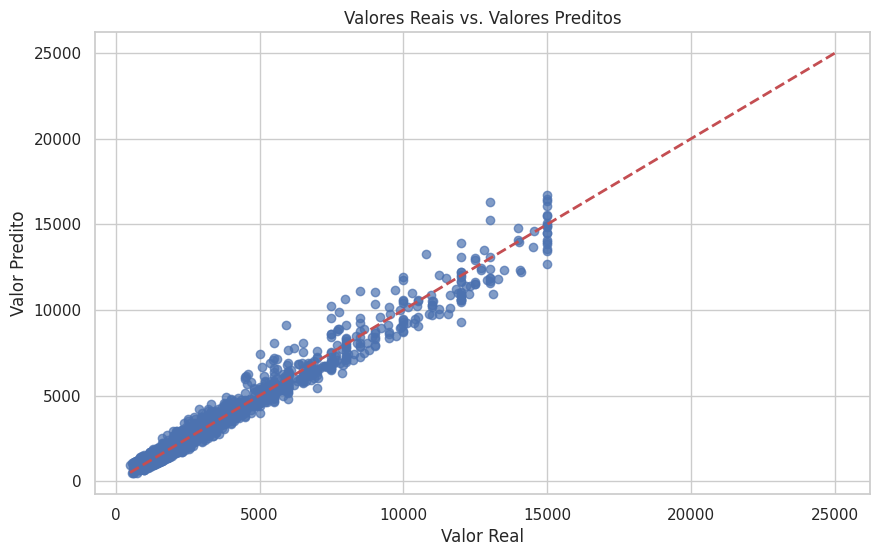

In [168]:
# Plotar a comparação entre valores reais e preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valores Reais vs. Valores Preditos')
plt.show()